In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings("ignore")
from matplotlib import cm
import math

# 数据读入与处理

In [2]:
data = pd.DataFrame(pd.read_csv('../dataset/wine/winemag-data_first150k.csv'))
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


##  数据处理，对连续数值数据进行分组操作

In [3]:
data=data[['country','points','price','province','variety','winery']].dropna()
data

,country,points,price,province,variety,winery
0,US,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,96,90.0,California,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,White Blend,Feudi di San Gregorio
150926,France,91,27.0,Champagne,Champagne Blend,H.Germain
150927,Italy,91,20.0,Southern Italy,White Blend,Terredora
150928,France,90,52.0,Champagne,Champagne Blend,Gosset


In [8]:
# 按分数进行分组
data['points_group']=''
data.loc[(data.points<=85),'points_group']='bad'
data.loc[(data.points<=90)&(data.points>85),'points_group']='not bad'
data.loc[(data.points<=95)&(data.points>90),'points_group']='good'
data.loc[(data.points > 95),'points_group']='great'
data

,country,points,price,province,variety,winery,points_group
0,US,96,235.0,California,Cabernet Sauvignon,Heitz,great
1,Spain,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,great
2,US,96,90.0,California,Sauvignon Blanc,Macauley,great
3,US,96,65.0,Oregon,Pinot Noir,Ponzi,great
4,France,95,66.0,Provence,Provence red blend,Domaine de la Bégude,good
...,...,...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,White Blend,Feudi di San Gregorio,good
150926,France,91,27.0,Champagne,Champagne Blend,H.Germain,good
150927,Italy,91,20.0,Southern Italy,White Blend,Terredora,good
150928,France,90,52.0,Champagne,Champagne Blend,Gosset,not bad


In [11]:
#按酒价进行分组
data['price_group']=''
data.loc[(data.price)<=15,'price_group']='cheap'
data.loc[(data.price>15)&(data.price<=25),'price_group']='medium'
data.loc[(data.price>25),'price_group']='expensive'
data

,country,points,price,province,variety,winery,points_group,price_group
0,US,96,235.0,California,Cabernet Sauvignon,Heitz,great,expensive
1,Spain,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,great,expensive
2,US,96,90.0,California,Sauvignon Blanc,Macauley,great,expensive
3,US,96,65.0,Oregon,Pinot Noir,Ponzi,great,expensive
4,France,95,66.0,Provence,Provence red blend,Domaine de la Bégude,good,expensive
...,...,...,...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,White Blend,Feudi di San Gregorio,good,medium
150926,France,91,27.0,Champagne,Champagne Blend,H.Germain,good,expensive
150927,Italy,91,20.0,Southern Italy,White Blend,Terredora,good,medium
150928,France,90,52.0,Champagne,Champagne Blend,Gosset,not bad,expensive


In [12]:
data=data[['country','province','variety','winery','price_group','points_group']]
data

,country,province,variety,winery,price_group,points_group
0,US,California,Cabernet Sauvignon,Heitz,expensive,great
1,Spain,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,expensive,great
2,US,California,Sauvignon Blanc,Macauley,expensive,great
3,US,Oregon,Pinot Noir,Ponzi,expensive,great
4,France,Provence,Provence red blend,Domaine de la Bégude,expensive,good
...,...,...,...,...,...,...
150925,Italy,Southern Italy,White Blend,Feudi di San Gregorio,medium,good
150926,France,Champagne,Champagne Blend,H.Germain,expensive,good
150927,Italy,Southern Italy,White Blend,Terredora,medium,good
150928,France,Champagne,Champagne Blend,Gosset,expensive,not bad


In [13]:
support=0.005
sum=data.shape[0]
sum
country_group=[]
country_group=data['country'].value_counts().to_frame()
country_group=country_group.reset_index()
country_group=country_group.drop(country_group[(country_group.country <= sum*support)].index)
country_group
country_array=np.array(country_group)
country_list = country_array.tolist()
country_list
#print(country_array)

[['US', 62139],
 ['Italy', 18784],
 ['France', 14785],
 ['Spain', 8160],
 ['Chile', 5766],
 ['Argentina', 5587],
 ['Australia', 4894],
 ['Portugal', 4176],
 ['New Zealand', 3070],
 ['Austria', 2483],
 ['Germany', 2347],
 ['South Africa', 2237],
 ['Greece', 872]]

In [14]:
getpoints_group=[]
getpoints_group=data['points_group'].value_counts().to_frame()
getpoints_group=getpoints_group.reset_index()
getpoints_group=getpoints_group.drop(getpoints_group[(getpoints_group.points_group <= sum*support)].index)
points_array=np.array(getpoints_group)
points_list=points_array.tolist()
print(points_list)

[['not bad', 75369], ['bad', 33813], ['good', 27000], ['great', 1048]]


In [15]:
province_group=[]
province_group=data['province'].value_counts().to_frame()
province_group=province_group.reset_index()
province_group=province_group.drop(province_group[(province_group.province <= sum*support)].index)
province_array=np.array(province_group)
province_list = province_array.tolist()
province_list

[['California', 44356],
 ['Washington', 9684],
 ['Tuscany', 5961],
 ['Northern Spain', 4823],
 ['Mendoza Province', 4706],
 ['Oregon', 4571],
 ['Burgundy', 3342],
 ['Veneto', 3103],
 ['South Australia', 2955],
 ['Piedmont', 2909],
 ['Bordeaux', 2658],
 ['New York', 2415],
 ['Sicily & Sardinia', 2032],
 ['Northeastern Italy', 1852],
 ['Marlborough', 1595],
 ['Loire Valley', 1391],
 ['Alsace', 1359],
 ['Catalonia', 1331],
 ['Southwest France', 1318],
 ['Central Italy', 1257],
 ['Rhône Valley', 1231],
 ['Colchagua Valley', 1192],
 ['Southern Italy', 1167],
 ['Champagne', 1089],
 ['Languedoc-Roussillon', 1023],
 ['Maipo Valley', 888],
 ['Other', 881],
 ['Douro', 860],
 ['Provence', 828],
 ['Casablanca Valley', 773],
 ['Mosel', 760],
 ['Central Spain', 743],
 ['Alentejano', 700]]

In [16]:
variety_group=[]
variety_group=data['variety'].value_counts().to_frame()
variety_group=variety_group.reset_index()
variety_group=variety_group.drop(variety_group[(variety_group.variety <= sum*support)].index)
variety_array=np.array(variety_group)
variety_list = variety_array.tolist()
variety_list

[['Chardonnay', 13775],
 ['Pinot Noir', 13625],
 ['Cabernet Sauvignon', 12671],
 ['Red Blend', 9377],
 ['Sauvignon Blanc', 6054],
 ['Syrah', 5667],
 ['Riesling', 5212],
 ['Merlot', 4987],
 ['Bordeaux-style Red Blend', 4545],
 ['Zinfandel', 3794],
 ['Malbec', 3085],
 ['Sangiovese', 2879],
 ['White Blend', 2554],
 ['Tempranillo', 2525],
 ['Rosé', 2461],
 ['Shiraz', 1945],
 ['Sparkling Blend', 1820],
 ['Portuguese Red', 1812],
 ['Nebbiolo', 1529],
 ['Rhône-style Red Blend', 1455],
 ['Cabernet Franc', 1310],
 ['Corvina, Rondinella, Molinara', 1292],
 ['Pinot Gris', 1275],
 ['Pinot Grigio', 1270],
 ['Viognier', 1255],
 ['Champagne Blend', 1003],
 ['Barbera', 967],
 ['Sangiovese Grosso', 938],
 ['Petite Sirah', 897],
 ['Gewürztraminer', 891],
 ['Grüner Veltliner', 842],
 ['Port', 791],
 ['Carmenère', 746],
 ['Tempranillo Blend', 734],
 ['Portuguese White', 716]]

In [17]:
winery_group=[]
winery_group=data['winery'].value_counts().to_frame()
winery_group=winery_group.reset_index()
#winery_group=winery_group.drop(winery_group[(winery_group.winery <= sum*support)].index)
winery_array=np.array(winery_group)
winery_list = winery_array.tolist()
winery_list

[['Williams Selyem', 371],
 ['Testarossa', 274],
 ['DFJ Vinhos', 249],
 ['Chateau Ste. Michelle', 225],
 ['Kendall-Jackson', 216],
 ['Columbia Crest', 216],
 ['Concha y Toro', 214],
 ['Trapiche', 201],
 ['Bouchard Père & Fils', 192],
 ['De Loach', 189],
 ['Joseph Drouhin', 185],
 ['Kenwood', 183],
 ['Cameron Hughes', 172],
 ['Morgan', 153],
 ['Dry Creek Vineyard', 153],
 ['Louis Latour', 153],
 ["D'Arenberg", 153],
 ['Concannon', 151],
 ['Robert Mondavi', 151],
 ['Martin Ray', 149],
 ['Wines & Winemakers', 148],
 ['Errazuriz', 148],
 ["L'Ecole No. 41", 144],
 ['Montes', 142],
 ['Iron Horse', 142],
 ['Renwood', 141],
 ['Waterbrook', 141],
 ['Santa Rita', 141],
 ['Calera', 140],
 ['Hogue', 139],
 ['Yalumba', 139],
 ['Gary Farrell', 138],
 ['Santa Ema', 137],
 ['Sineann', 137],
 ['Bodega Norton', 134],
 ['Seven Hills', 130],
 ['Rodney Strong', 128],
 ['Wellington', 127],
 ['Novy', 124],
 ['Viu Manent', 123],
 ['Adelaida', 122],
 ['Planeta', 121],
 ['Saint Clair', 121],
 ['Thomas Fogarty',

In [18]:
#经上一步分析 winery取值非常分散 没有winery的出现占比超过千分之五，对该列进行drop操作
data = data.drop('winery',axis=1)
data

,country,province,variety,price_group,points_group
0,US,California,Cabernet Sauvignon,expensive,great
1,Spain,Northern Spain,Tinta de Toro,expensive,great
2,US,California,Sauvignon Blanc,expensive,great
3,US,Oregon,Pinot Noir,expensive,great
4,France,Provence,Provence red blend,expensive,good
...,...,...,...,...,...
150925,Italy,Southern Italy,White Blend,medium,good
150926,France,Champagne,Champagne Blend,expensive,good
150927,Italy,Southern Italy,White Blend,medium,good
150928,France,Champagne,Champagne Blend,expensive,not bad


In [19]:
getprice_group=[]
getprice_group=data['price_group'].value_counts().to_frame()
getprice_group=getprice_group.reset_index()
getprice_group
price_group_array=np.array(getprice_group)
price_group_list = price_group_array.tolist()
price_group_list

[['expensive', 62059], ['medium', 41281], ['cheap', 33890]]

In [20]:
#对country与variety进行分析
country_array = country_array[:,0]
country_list = country_array.tolist()
country_list

['US',
 'Italy',
 'France',
 'Spain',
 'Chile',
 'Argentina',
 'Australia',
 'Portugal',
 'New Zealand',
 'Austria',
 'Germany',
 'South Africa',
 'Greece']

In [21]:
variety_array=variety_array[:,0]
variety_list=variety_array.tolist()
variety_list

['Chardonnay',
 'Pinot Noir',
 'Cabernet Sauvignon',
 'Red Blend',
 'Sauvignon Blanc',
 'Syrah',
 'Riesling',
 'Merlot',
 'Bordeaux-style Red Blend',
 'Zinfandel',
 'Malbec',
 'Sangiovese',
 'White Blend',
 'Tempranillo',
 'Rosé',
 'Shiraz',
 'Sparkling Blend',
 'Portuguese Red',
 'Nebbiolo',
 'Rhône-style Red Blend',
 'Cabernet Franc',
 'Corvina, Rondinella, Molinara',
 'Pinot Gris',
 'Pinot Grigio',
 'Viognier',
 'Champagne Blend',
 'Barbera',
 'Sangiovese Grosso',
 'Petite Sirah',
 'Gewürztraminer',
 'Grüner Veltliner',
 'Port',
 'Carmenère',
 'Tempranillo Blend',
 'Portuguese White']

## 将不在country_list以及variety_list范围内的行删除

In [22]:
data1=data.drop(columns=['province','price_group','points_group'])
data1=data1[((data['country'].isin(country_list))&(data['variety'].isin(variety_list)))]

In [24]:
#进行索引重置
data.index=range(len(data))
data

,country,province,variety,price_group,points_group
0,US,California,Cabernet Sauvignon,expensive,great
1,Spain,Northern Spain,Tinta de Toro,expensive,great
2,US,California,Sauvignon Blanc,expensive,great
3,US,Oregon,Pinot Noir,expensive,great
4,France,Provence,Provence red blend,expensive,good
...,...,...,...,...,...
137225,Italy,Southern Italy,White Blend,medium,good
137226,France,Champagne,Champagne Blend,expensive,good
137227,Italy,Southern Italy,White Blend,medium,good
137228,France,Champagne,Champagne Blend,expensive,not bad


In [25]:
#获得要进行处理的数据list表
data_analyze=[]
for i in range(1,len(data)):
    item = []
    item.append("country" +':'+ str(data.loc[i,'country']))
    item.append("province" + ':'+ str(data.loc[i,'province']))
    item.append("variety" + ':'+ str(data.loc[i,'variety']))
    item.append("price_group" + ':'+ str(data.loc[i,'price_group']))
    item.append("points_group" +':'+ str(data.loc[i,'points_group']))
    
    data_analyze.append(item)
data_analyze

[['country:Spain',
  'province:Northern Spain',
  'variety:Tinta de Toro',
  'price_group:expensive',
  'points_group:great'],
 ['country:US',
  'province:California',
  'variety:Sauvignon Blanc',
  'price_group:expensive',
  'points_group:great'],
 ['country:US',
  'province:Oregon',
  'variety:Pinot Noir',
  'price_group:expensive',
  'points_group:great'],
 ['country:France',
  'province:Provence',
  'variety:Provence red blend',
  'price_group:expensive',
  'points_group:good'],
 ['country:Spain',
  'province:Northern Spain',
  'variety:Tinta de Toro',
  'price_group:expensive',
  'points_group:good'],
 ['country:Spain',
  'province:Northern Spain',
  'variety:Tinta de Toro',
  'price_group:expensive',
  'points_group:good'],
 ['country:Spain',
  'province:Northern Spain',
  'variety:Tinta de Toro',
  'price_group:expensive',
  'points_group:good'],
 ['country:US',
  'province:Oregon',
  'variety:Pinot Noir',
  'price_group:expensive',
  'points_group:good'],
 ['country:US',
  'pro

## 生成频繁模式，最终结果x为生成的频繁模式

In [26]:
items = []
for i in data_analyze:
    for j in i:
        if not [j] in items:
            items.append([j])
            
items=map(frozenset,items)

In [27]:
#根据本轮的频繁项集产生候选频繁项集
def getCandidate(lastK,k):
    problist = []
    length = len(lastK)
    for i in range(length):
        for j in range(i+1,length):
            L1=list(lastK[i])[:k-2]
            L2=list(lastK[j])[:k-2]
            L1.sort()
            L2.sort()
            if (L1==L2):
                problist.append(lastK[i]|lastK[j])
    return problist

#定义不断生成频繁k项集、项集计数函数
def getfrek(dataset,problist,minsupport): #数据集，可能项输入，最小支持度
    
    probk = {} #可能的k频繁项集
    totalnum=float(len(dataset))
    temp_list=list(problist)
    for record in dataset:
        for item in temp_list:
            #print('record is: ',record)
            #print('item is: ',item)
            #print('judge: ',item.issubset(record))
            if item.issubset(record):
                if item not in probk:
                    probk[item]=1
                    #print(probk[item])
                else:
                    probk[item] += 1
    #到此获取全部可能频繁项对应的个数，下面获取k个频繁项，以及对应的支持度
    
    klist=[]
    supportData={}
    for i in probk:
        if totalnum == 0: #特殊情况
            continue
        support = probk[i]/totalnum
        if support >= minsupport:
            klist.append(i)#获取全部频繁项集
            supportData[i]=support#生成相应支持度
    return klist,supportData

In [29]:
def apriori(dataset, minsupport,tmp_item):
    freqK,totalsupportData=getfrek(dataset,tmp_item,minsupport)#进行第一轮筛选，获取可能的全部一项频繁集
    totalFreqItems=[freqK]
    k=2
    while(len(totalFreqItems[k-2]) > 0):#当前一轮里没有频繁项时跳出循环
        problist=getCandidate(totalFreqItems[k-2],k)
        klist,supportData=getfrek(dataset,problist,minsupport)
        totalsupportData.update(supportData)
        totalFreqItems.append(klist)
        k+=1
    return totalFreqItems,totalsupportData

In [30]:
x,y=apriori(data_analyze,0.05,items)

## 关联规则的生成

In [33]:
def calcConf(freqSet, H, supportData, brl, minConf=0.7):
    prunedH = []
    lift = []
    for conseq in H:  # 后件中的每个元素
        conf = supportData[freqSet] / supportData[freqSet - conseq]
        if conf >= minConf:
            print(str(freqSet - conseq)+"-->"+str(conseq)+" support:"+str(supportData[freqSet])+" conf:"+str(conf)+'\n')
            brl.append((freqSet - conseq, conseq, supportData[freqSet], conf))  # 添加入规则集中
            prunedH.append(conseq)  # 添加入被修剪过的H中
    return prunedH

def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.7):
    m = len(H[0])  # H是一系列后件长度相同的规则，所以取H0的长度即可
    if (len(freqSet) > m + 1):
        Hmp1 = getCandidate(H, m + 1)
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)
        
def generateRules(L, supportData, minConf=0.7):
    bigRuleList = []  # 存储规则
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList

In [37]:
rules = generateRules(x, y, minConf=0.5)
print(rules)

frozenset({'price_group:expensive'})-->frozenset({'country:US'}) support:0.24771003213606455 conf:0.5477617712462535

frozenset({'country:US'})-->frozenset({'price_group:expensive'}) support:0.24771003213606455 conf:0.5470565515465576

frozenset({'province:California'})-->frozenset({'price_group:expensive'}) support:0.18653491608916484 conf:0.5771164468492842

frozenset({'country:US'})-->frozenset({'province:California'}) support:0.3232188531578602 conf:0.7138144130805626

frozenset({'province:California'})-->frozenset({'country:US'}) support:0.3232188531578602 conf:1.0

frozenset({'variety:Pinot Noir'})-->frozenset({'price_group:expensive'}) support:0.07476553789650875 conf:0.7530275229357798

frozenset({'variety:Pinot Noir'})-->frozenset({'country:US'}) support:0.07480197334382674 conf:0.753394495412844

frozenset({'points_group:good'})-->frozenset({'price_group:expensive'}) support:0.1704231612851511 conf:0.8661851851851852

frozenset({'points_group:good'})-->frozenset({'country:US'

## 用lift对关联规则进行评价

In [46]:
def lift_eval(rules, suppData): # lift evaluation
    # lift(A, B) = P(A交B) / (P(A) * P(B)) 
    # = P(A) * P(B | A) / (P(A) * P(B)) = P(B | A) / P(B) = confidence(A— > B) / support(B) = confidence(B— > A) / support(A)
    lift = []
    for rule in rules:
        freqSet_conseq = rule[0]
        conseq = rule[1]
        lift_val = float(rule[3]) / float(suppData[rule[1]])
        lift.append([freqSet_conseq,conseq,lift_val])
    return lift

In [351]:
lifts = lift_eval(rules, y)
for item in lifts:
    print(item)

[frozenset({'price_group:expensive'}), frozenset({'country:US'}), 1.20970742711951]
[frozenset({'country:US'}), frozenset({'price_group:expensive'}), 1.20970742711951]
[frozenset({'province:California'}), frozenset({'price_group:expensive'}), 1.2761789436443394]
[frozenset({'country:US'}), frozenset({'province:California'}), 2.208455373523448]
[frozenset({'province:California'}), frozenset({'country:US'}), 2.2084553735234476]
[frozenset({'variety:Pinot Noir'}), frozenset({'price_group:expensive'}), 1.6651715160809908]
[frozenset({'variety:Pinot Noir'}), frozenset({'country:US'}), 1.6638381217774818]
[frozenset({'points_group:good'}), frozenset({'price_group:expensive'}), 1.9153973182793156]
[frozenset({'points_group:good'}), frozenset({'country:US'}), 1.1310563298178606]
[frozenset({'variety:Pinot Noir'}), frozenset({'province:California'}), 1.7196290016226465]
[frozenset({'variety:Chardonnay'}), frozenset({'country:US'}), 1.2987801801026098]
[frozenset({'variety:Cabernet Sauvignon'}),

## 用全置信度对关联规则进行评价

In [65]:
def all_confidence(rules):
    all_confidence=[]
    for i in range(int(len(rules)/2)):
        freqSet_conseq=rules[i*2][0]
        conseq=rules[i*2][1]
        all_confidence_item=min(rules[i*2][3],rules[i*2+1][3])
        all_confidence.append([freqSet_conseq,conseq,all_confidence_item])
    return all_confidence

In [67]:
all_confidences=all_confidence(rules)
for item in all_confidences:
    print(item)

[frozenset({'price_group:expensive'}), frozenset({'country:US'}), 0.5470565515465576]
[frozenset({'province:California'}), frozenset({'price_group:expensive'}), 0.5771164468492842]
[frozenset({'province:California'}), frozenset({'country:US'}), 0.7530275229357798]
[frozenset({'variety:Pinot Noir'}), frozenset({'country:US'}), 0.753394495412844]
[frozenset({'points_group:good'}), frozenset({'country:US'}), 0.5121481481481481]
[frozenset({'variety:Chardonnay'}), frozenset({'country:US'}), 0.5880943738656987]
[frozenset({'variety:Cabernet Sauvignon'}), frozenset({'country:US'}), 0.5861089187056038]
[frozenset({'province:Washington'}), frozenset({'country:US'}), 0.5042540848883302]
[frozenset({'country:US'}), frozenset({'points_group:not bad'}), 0.5016576008239725]
[frozenset({'country:France'}), frozenset({'points_group:not bad'}), 0.5597565099763274]
[frozenset({'country:Italy'}), frozenset({'points_group:not bad'}), 0.5227155963302752]
[frozenset({'price_group:cheap'}), frozenset({'poin

## 对关联规则进行可视化展示

In [79]:
support=[]
confidence=[]
for item in rules:
    confidence.append(item[3])
    support.append(y[item[0]])
draw_df=pd.DataFrame({'support':support,'confidence':confidence})

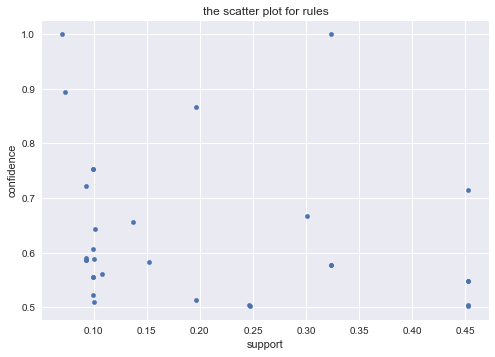

In [85]:
draw_df.plot(kind="scatter",x="support",y="confidence")
plt.title("the scatter plot for rules")
plt.show()

## 结果分析

In [ ]:
取其中部分关联规则进行分析展示：

产地为美国的酒中，有54.7%的可能性价格较贵
评分较高的酒中，有86.6%的可能性价格较贵
评分较差的酒中，有50.3%的可能性价格较便宜
产地为意大利的酒中，有65.6%的可能性评分较高